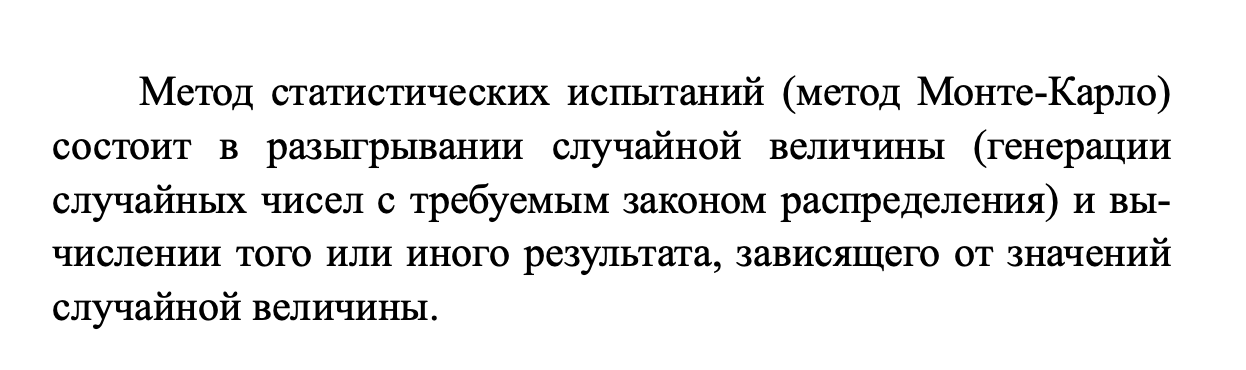

In [12]:
"""Module on monte carlo."""

'Module on monte carlo.'

In [13]:
import numpy as np
import pandas as pd

# from numpy.typing import NDArray
# import seaborn as sns # надстройка над матплотлиб
# from typing import Any

In [14]:
# кидаем кубик
print(np.random.randint(1, 7))

5


In [15]:
# грани кубика
x_cube = np.arange(1, 7)

In [16]:
# void
# [4, 5, 1, 6, 2, 3]
print(np.random.shuffle(x_cube))

None


In [17]:
print(x_cube)

[3 1 5 2 4 6]


In [18]:
# выборка без повторений, replace=False
# мы берём грань и не возвращаем её
print(np.random.choice([1, 2, 3, 4, 5, 6], size=6, replace=False))

[4 5 1 2 3 6]


In [19]:
# чтобы воспроизвести результаты эксперимента, нужно задать сиид
print(np.random.seed(321))

#  выборка с повторением
# [5, 3, 5, 2, 1, 2, 1, 3, 1, 5] # 321
print(np.random.choice([1, 2, 3, 4, 5, 6], size=10, replace=True))

None
[5 3 5 2 1 2 1 3 1 5]


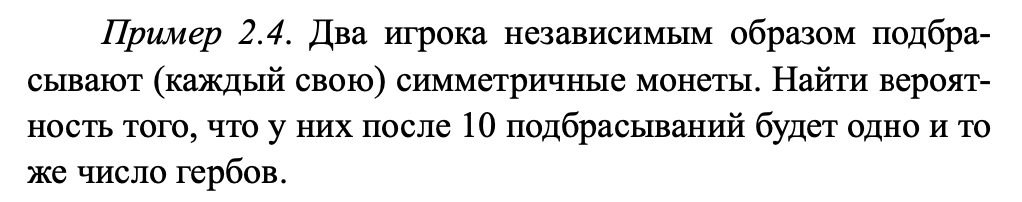

In [20]:
n_ = 10**6  # > 10000 , > 100000
# счётчик благоприятствующих
m_ = 0
# Начальная установка датчика случайных чисел
print(np.random.seed(310))

# создаем модель

for i in range(0, n_):
    # 10 подбрасываний монетки
    a_ = np.random.choice([0, 1], p=[0.5, 0.5], size=10)
    b_ = np.random.choice([0, 1], p=[0.5, 0.5], size=10)

    if sum(a_) == sum(b_):
        m_ += 1

# относительная частота событий
proba = m_ / n_
# 0.176369
proba

None


0.176369

In [21]:
summa_a: int = sum([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])
summa_b: int = sum([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])
print(summa_a == summa_b)

True


In [22]:
print(n_)

1000000


In [23]:
# монетка
#  sample - выборка
print(type(pd.Series([0, 1]).sample(1)))
# pandas.core.series.Series

<class 'pandas.core.series.Series'>


In [24]:
# numpy.int64
print(type(pd.Series([0, 1]).sample(1).values[0]))

<class 'numpy.int64'>


In [25]:
print(pd.Series([0, 1]).sample(1).values[0] + 1)

2


In [26]:
# выборка с повторением
print(pd.Series([0, 1]).sample(10, replace=True))

0    0
1    1
1    1
0    0
1    1
0    0
1    1
1    1
1    1
0    0
dtype: int64


In [27]:
# ДСВ, PMF
# монетка
print(np.random.binomial(1, 0.5))

1


In [28]:
# ДСВ, PMF
# монетка 3 раза
print(np.random.binomial(1, 0.5, size=3))

[0 0 1]


In [29]:
# побрасываем 3 раза монетку

result_1: list[int] = []
#  O(n)
for _ in range(3):
    result_1.append(np.random.binomial(1, 0.5))

In [30]:
print(result_1)

[1, 1, 0]


In [31]:
# побрасываем 3 раза монетку
print([np.random.binomial(1, 0.5) for _ in range(3)])

[1, 1, 0]


In [63]:
# создаем функцию подбрасывания монетки


def coin_toss() -> float:
    """Подбрасывает монету и возвращает результат.

    Возвращает:
        int: 1, если выпала решка, 0, если орел.
    """
    return pd.Series([0, 1]).sample(1).item()

In [33]:
# создаем функцию подбрасывания монетки


def coin_toss2() -> int:
    """Подбрасывает монету и возвращает результат.

    Возвращает:
        int: 1, если выпала решка, 0, если орел.
    """
    return np.random.binomial(1, 0.5)

In [67]:
print(coin_toss())
print(coin_toss2())

0
1


In [68]:
result: list[float] = []
for _ in range(3):
    result.append(coin_toss())
print(result)

[0, 1, 1]


In [55]:
list_comreh_0: list[float] = [coin_toss() for _ in range(3)]
print(list_comreh_0)

[1, 1, 0]


In [56]:
list_comreh_1: list[int] = [coin_toss2() for _ in range(3)]
print(list_comreh_1)

[0, 1, 0]


In [39]:
# монетка 10 выборок
# выборка с повторением
print(pd.Series([0, 1]).sample(10, replace=True))

0    0
0    0
1    1
1    1
0    0
0    0
0    0
1    1
1    1
1    1
dtype: int64


In [62]:
# кубик 10 выборок
lst = pd.Series([1, 2, 3, 4, 5, 6])
print(lst.sample(10, replace=True))

4    5
5    6
0    1
4    5
2    3
0    1
2    3
5    6
3    4
5    6
dtype: int64


In [60]:
# выдадим общий индекс, и уберем 1 колонку - индексы
print(lst.sample(10, replace=True).reset_index())

   index  0
0      5  6
1      3  4
2      2  3
3      0  1
4      5  6
5      4  5
6      3  4
7      0  1
8      0  1
9      2  3


In [61]:
# уберем 1 колонку - индексы
sampled_series = lst.sample(10, replace=True).reset_index(drop=True)

# Print the sampled Series
print(sampled_series)

0    6
1    1
2    5
3    3
4    1
5    3
6    4
7    2
8    5
9    6
dtype: int64


In [45]:
# кубик 1000 подбрасываний, посчитаем количество каждой грани
# для дискретной переменной, чтобы посмотреть распределение
# нужно value_counts
# дсв
print(pd.Series(np.random.randint(1, 7, size=10000)).value_counts())

6    1760
3    1686
4    1645
5    1644
2    1638
1    1627
dtype: int64


In [46]:
print(1 / 6)

0.16666666666666666
